################################################################################
Strategy 1
################################################################################
Density: 0.0
Cancelled Turns: 0


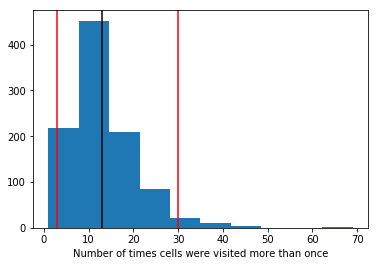

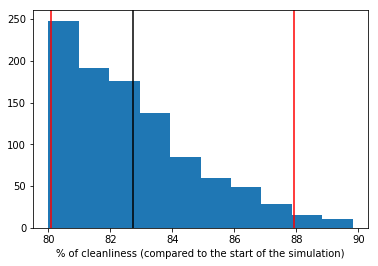

Density: 0.1
Cancelled Turns: 0


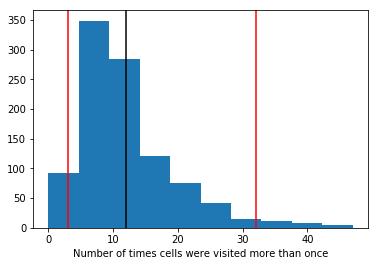

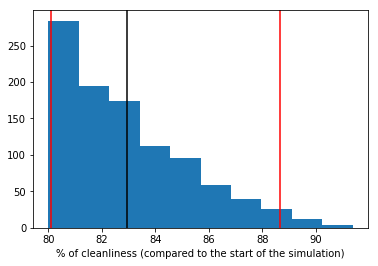

Density: 0.2
Cancelled Turns: 0


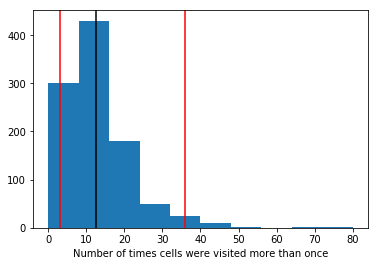

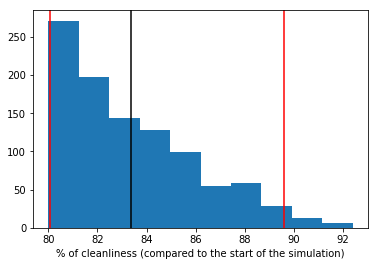

Density: 0.30000000000000004
Cancelled Turns: 1


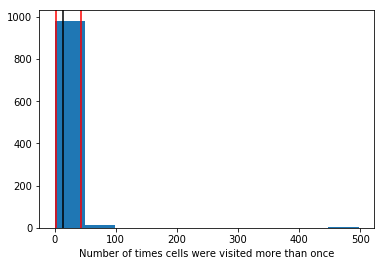

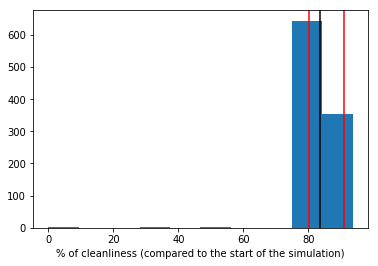

Density: 0.4
Cancelled Turns: 9


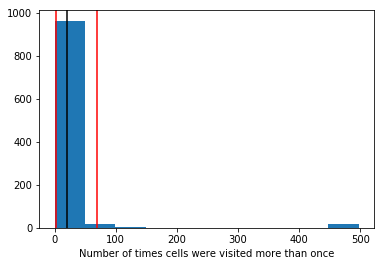

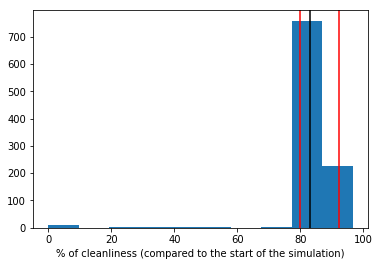

Density: 0.5
Cancelled Turns: 32


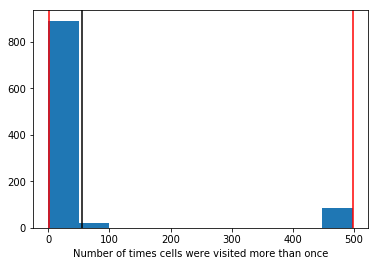

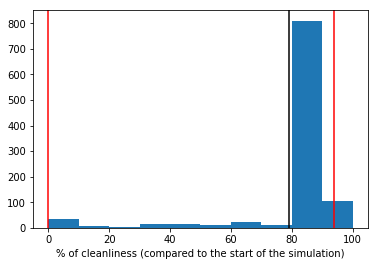

Density: 0.6000000000000001
Cancelled Turns: 59


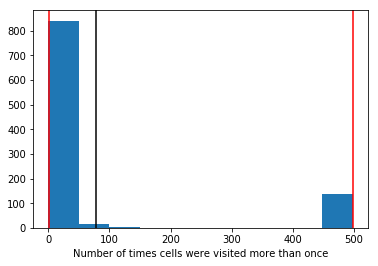

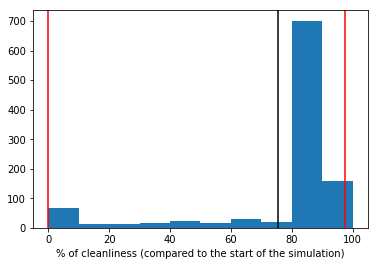

Density: 0.7000000000000001
Cancelled Turns: 137


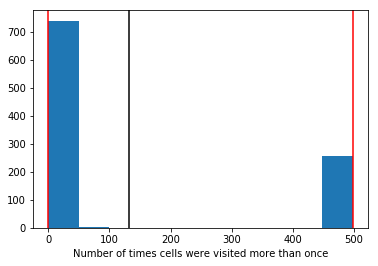

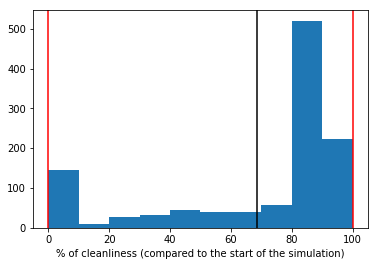

Density: 0.8
Cancelled Turns: 329


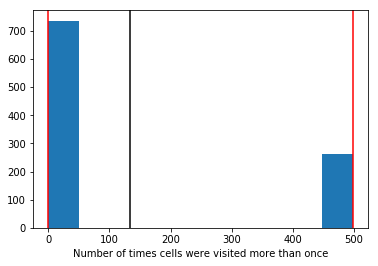

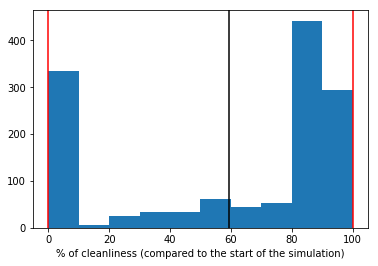

Run Summary:


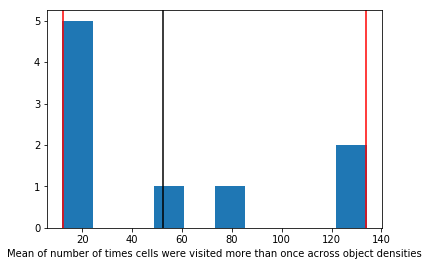

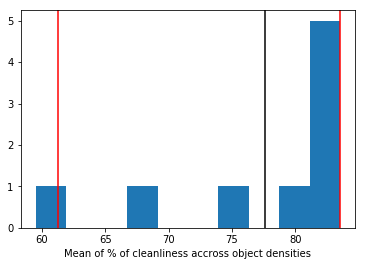

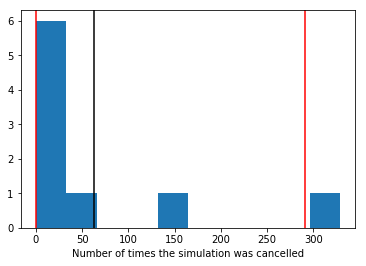


################################################################################
Strategy 2
################################################################################
Density: 0.0
Cancelled Turns: 0


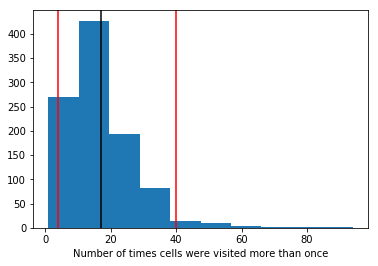

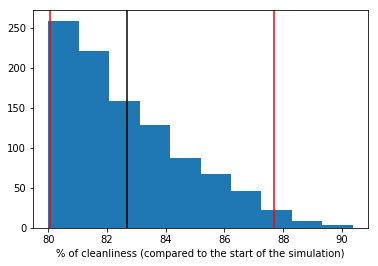

Density: 0.1
Cancelled Turns: 2


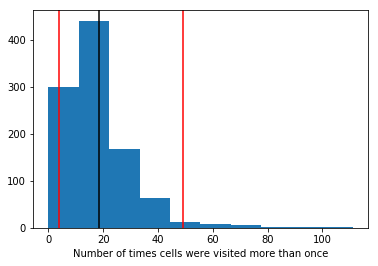

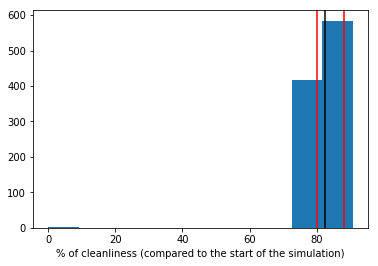

Density: 0.2
Cancelled Turns: 12


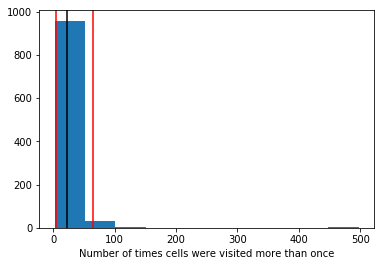

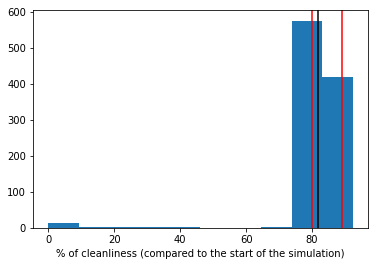

Density: 0.30000000000000004
Cancelled Turns: 9


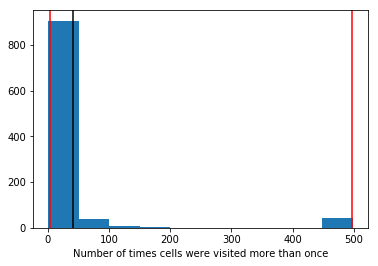

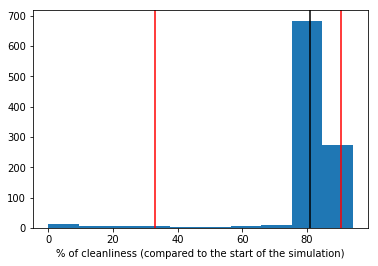

Density: 0.4
Cancelled Turns: 48


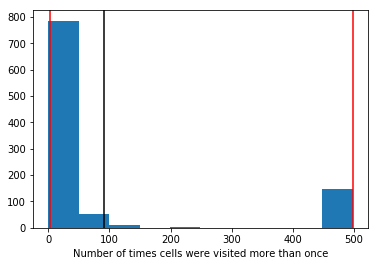

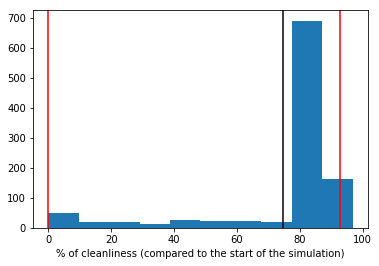

Density: 0.5
Cancelled Turns: 138


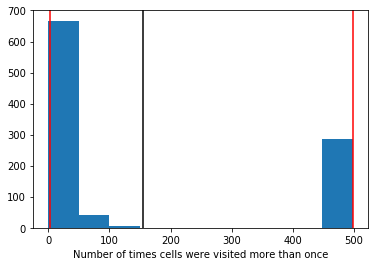

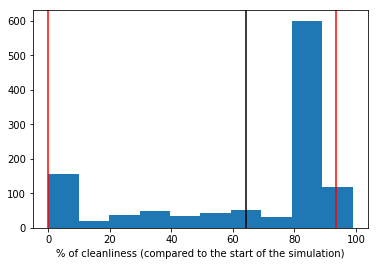

Density: 0.6000000000000001
Cancelled Turns: 234


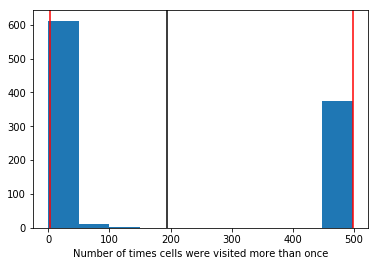

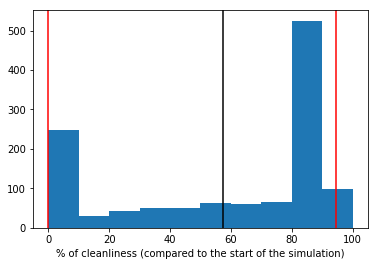

Density: 0.7000000000000001
Cancelled Turns: 462


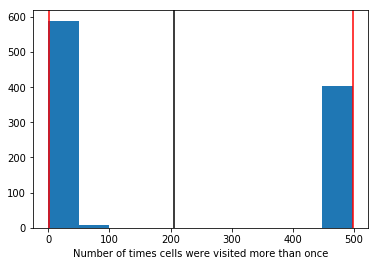

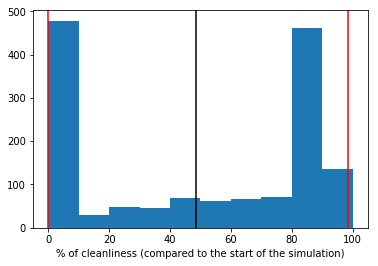

Density: 0.8
Cancelled Turns: 890


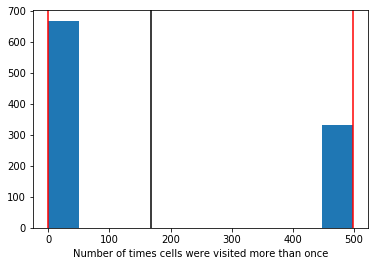

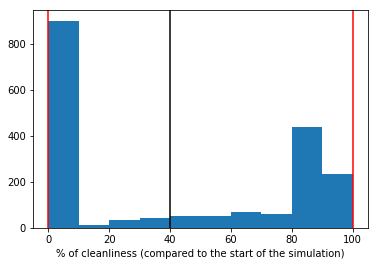

Run Summary:


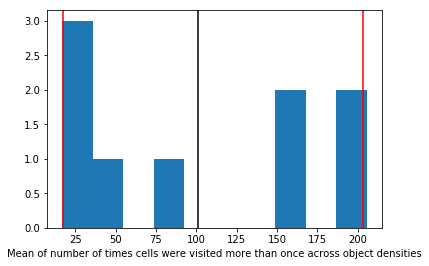

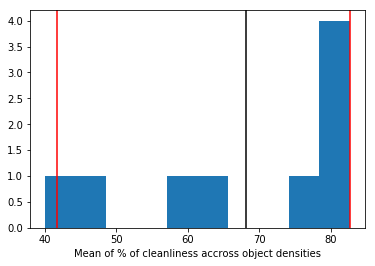

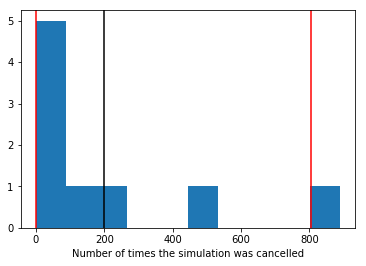


################################################################################
Strategy 3
################################################################################
Density: 0.0
Cancelled Turns: 0


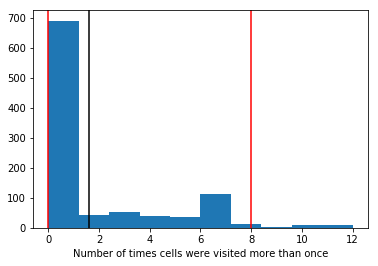

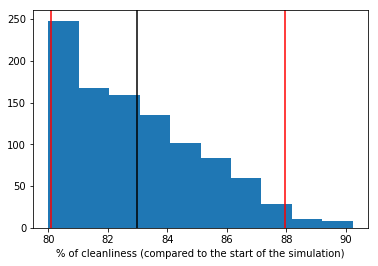

Density: 0.1
Cancelled Turns: 0


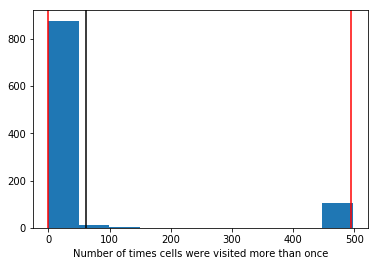

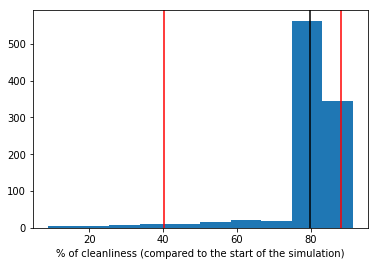

Density: 0.2
Cancelled Turns: 2


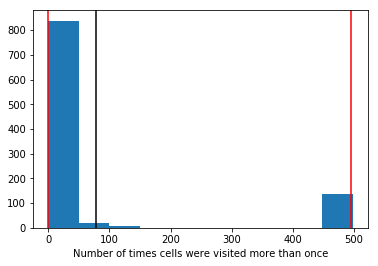

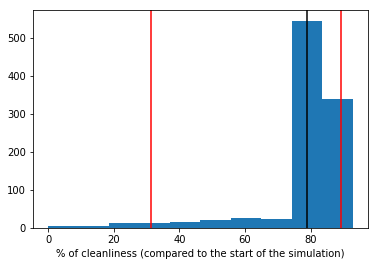

Density: 0.30000000000000004
Cancelled Turns: 4


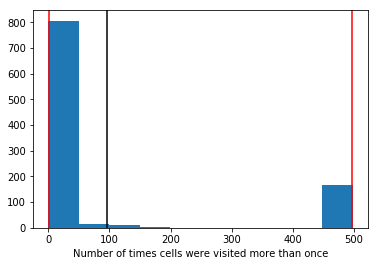

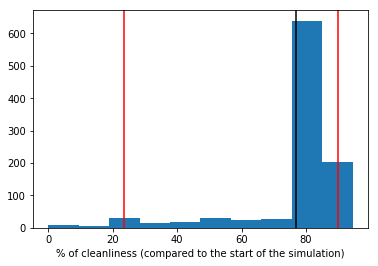

Density: 0.4
Cancelled Turns: 3


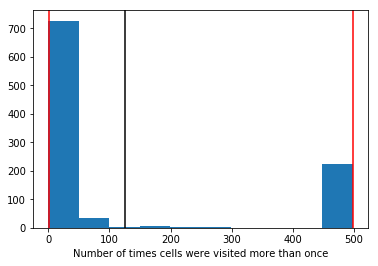

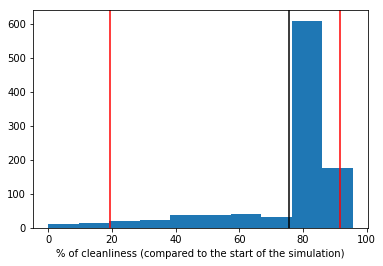

Density: 0.5
Cancelled Turns: 25


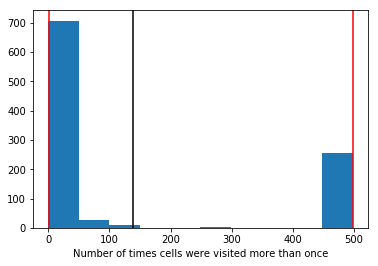

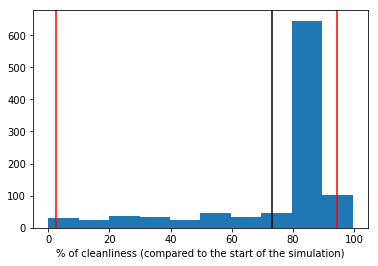

Density: 0.6000000000000001
Cancelled Turns: 52


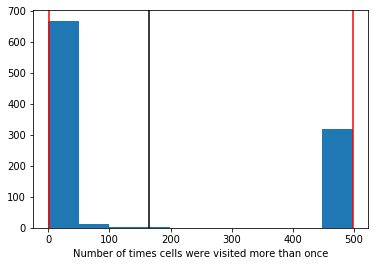

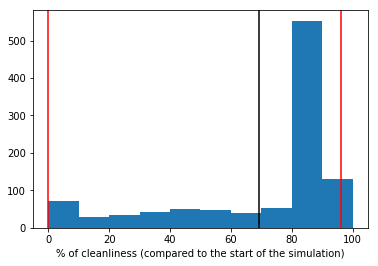

Density: 0.7000000000000001
Cancelled Turns: 156


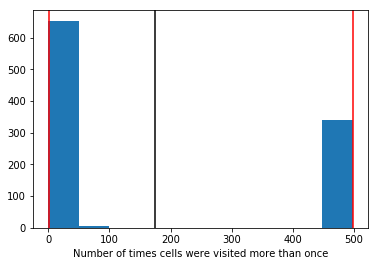

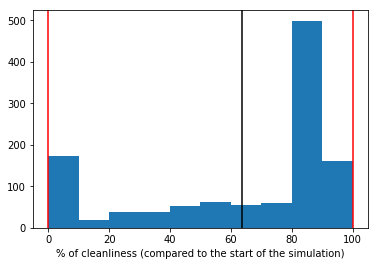

Density: 0.8
Cancelled Turns: 337


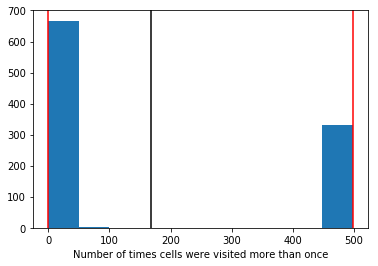

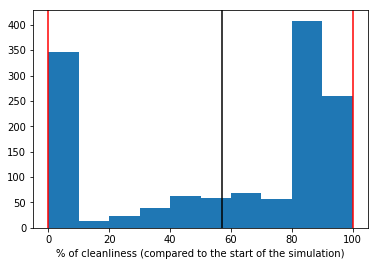

Run Summary:


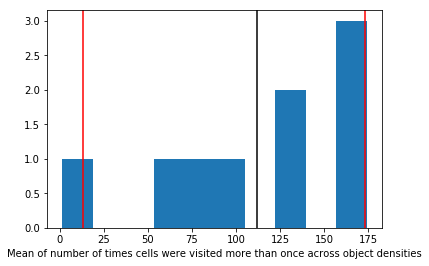

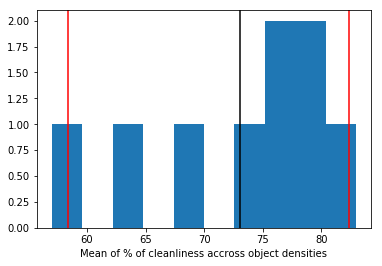

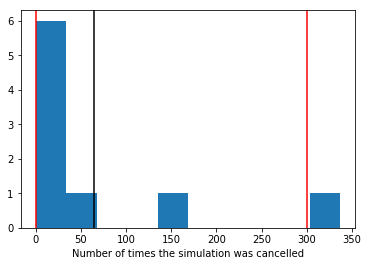


################################################################################
Strategy 4
################################################################################
Density: 0.0
Cancelled Turns: 0


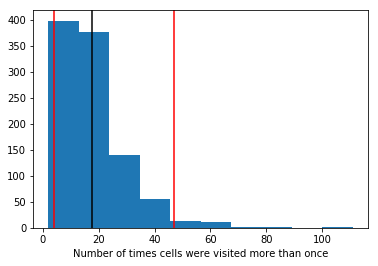

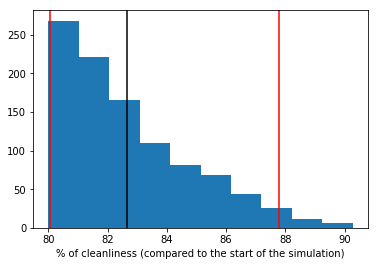

Density: 0.1
Cancelled Turns: 43


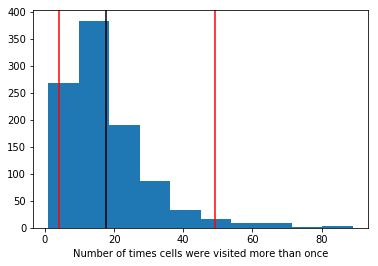

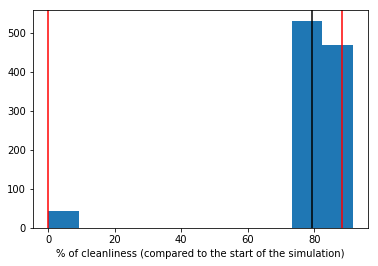

Density: 0.2
Cancelled Turns: 119


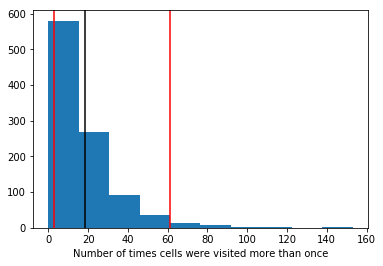

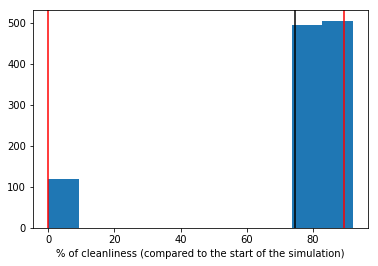

Density: 0.30000000000000004
Cancelled Turns: 176


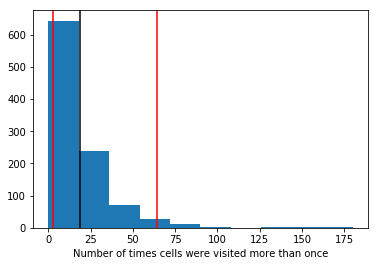

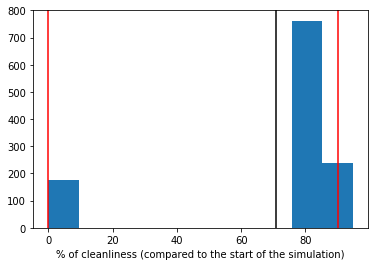

Density: 0.4
Cancelled Turns: 321


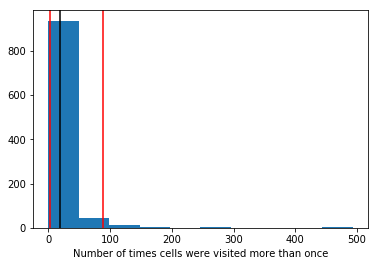

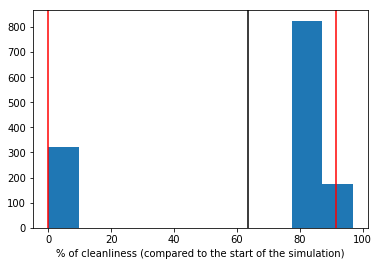

Density: 0.5
Cancelled Turns: 379


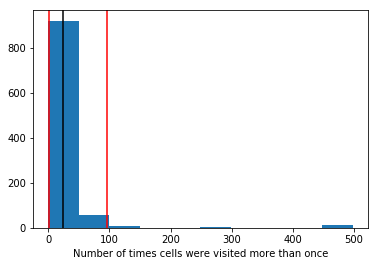

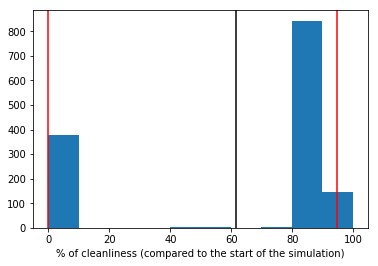

Density: 0.6000000000000001
Cancelled Turns: 514


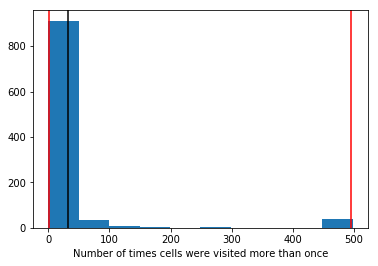

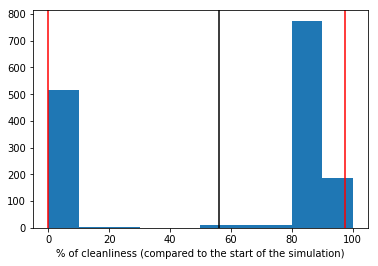

Density: 0.7000000000000001
Cancelled Turns: 803


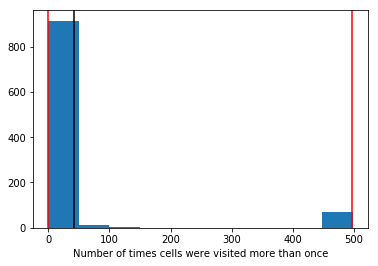

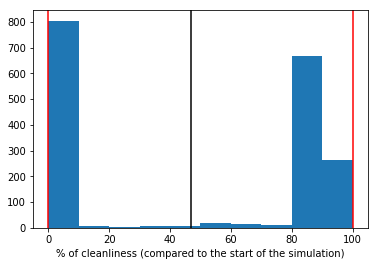

Density: 0.8
Cancelled Turns: 1083


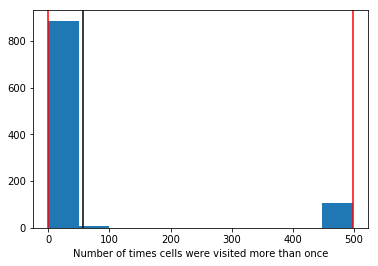

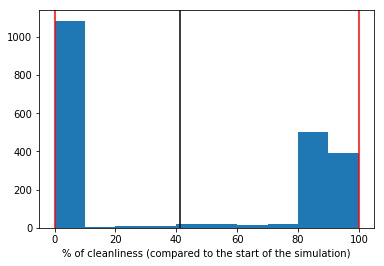

Run Summary:


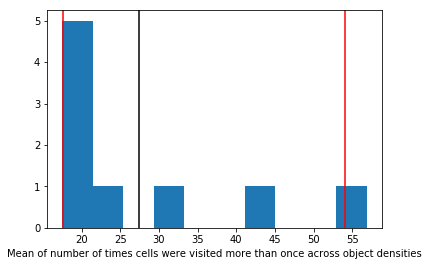

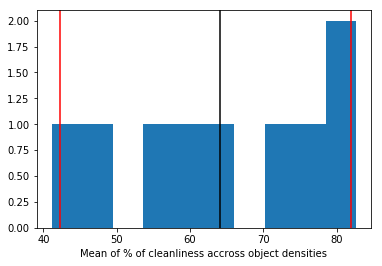

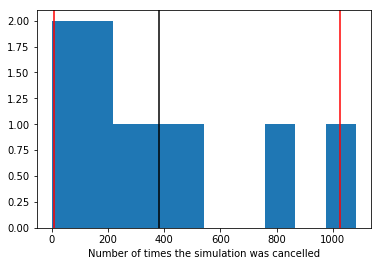

In [1]:

import random
import numpy
import copy
from matplotlib import pyplot as plt
%matplotlib inline

'''
Class: Cell

Attributes:
[int] dirt: Indicates whether or not the given cell is dirty
[int] index: cell unique identifier
[boolean] hasObstacle: indicates whether or not there is an obstacle at the given cell

Methods:
__init__(self): initializes Cell object
Returns: N/A

__repr__(self): overrides how the cell is displayed
Returns: String

'''
class Cell:
    def __init__(self):
        self.dirt = 0
        self.hasObstacle = False
        self.index = 0
    def __repr__(self):
        if self.hasObstacle == True:
            return "x"
        elif self.hasObstacle == False:
            if self.dirt > 0:
                return "."
            else:
                return "_"
        else:
            return "R"

'''
Class: Room

Attributes:
[int] gridSize: size of one of the sides of the grid
[float] dirtyCellsDensity: density of dirty cells in the grid
[float] obstacleDensity: density of objects in the grid
[float] totalDirtyCells: total dirt in cells (to be updated as the room gets cleaned)
[float] totalInitialDirtyCells: total initial dirt in cells 
[list] grid: the grid that represents the room

Methods:
__init__(self, gridSize,dirtyCellDensity, obstacleDensity): initializes Room object
Returns: N/A

initGrid(self): initializes grid with its obstacles
Retuns: list()

initDirtyCells(self): initialized dirty cells in the room
Returns: N/A

printRoom(self): helper function that setups how the room should be displayed
Returns: String

__repr__(self): overrides how the room is displayed
Returns: String

'''
class Room:
    def __init__(self, gridSize, dirtyCellsDensity, obstacleChance):
        self.gridSize = gridSize
        self.dirtyCellsDensity = dirtyCellsDensity
        self.obstacleChance = obstacleChance
        self.totalDirtyCells = 0
        self.initialTotalDirtyCells = 0
        self.grid = self.initGrid()
        
        self.initDirtyCells()
        
    def initGrid(self):
        grid = [[None]*self.gridSize for _ in range(self.gridSize)]
        count = 0
        g = [i for i in range(self.gridSize**2)]
        dirtIndexes = numpy.random.choice(g,
                size=(int(self.obstacleChance*self.gridSize**2)),replace=False)
        
        for i in range(self.gridSize):
            for j in range(self.gridSize):
                grid[i][j] = Cell()
                grid[i][j].index = count
                if grid[i][j].index in dirtIndexes:
                    grid[i][j].hasObstacle = True
                count +=1
        
        return grid
    
    def initDirtyCells(self):
        gridWithoutObstacle = [e.index for line in self.grid for e in line if e.hasObstacle == False]
        self.initialTotalDirtyCells = self.dirtyCellsDensity*len(gridWithoutObstacle)
        totalDirtyCells = copy.deepcopy(self.initialTotalDirtyCells)
        dirt = [0]*len(gridWithoutObstacle)
        
        while totalDirtyCells > 0:
            for i in range(len(dirt)):
                d = totalDirtyCells - random.uniform(0,totalDirtyCells)
                if dirt[i] + d <= 1:
                    dirt[i] += d
                    totalDirtyCells -= d
           
        dirtIndexes = numpy.random.choice(gridWithoutObstacle,
                size=(len(dirt)),replace=False)
        
        for i in range(self.gridSize):
            for j in range(self.gridSize):
                if self.grid[i][j].index in dirtIndexes:
                    self.grid[i][j].dirt = dirt.pop() 
            
        self.totalDirtyCells = copy.deepcopy(self.initialTotalDirtyCells)
        
    def printRoom(self):
        s = ""
        for i in range(self.gridSize):
            s += str((self.grid[i]))
            s += '\n'
        return s
            
    def __repr__(self):
        return self.printRoom()

'''
Class: Roomba

Attributes:
[dict] cellVisits: holds how many times the same cell has been revisited 
[int]revisitCleanedCellCount: counts how many times in total the roomba revisits cells
[int] cleanedCellCount: counts how many cells have been cleaned
[Room] room: stores the room the roomba is at
[int] currentX: roomba's x position in the room
[int] currentY: roomba's y position in the room

Methods:
__init__(self, room): initializes Cell object
Returns: N/A

initRoomba(self): randomly initializes roomba's position in the room
Returns: N/A

__repr__(self): overrides how the cell is displayed
Returns: String

initCellVisits(self): initialized revisited cells dictionary
Returns: N/A

move(self): moves the roomba to the next cell given the specified strategy
Returns: boolean

moveRoomba(self): helper function to move roomba to the next cell given the specified strategy
Returns: boolean

'''
class Roomba:
    def __init__(self, room):
        self.cellVisits = dict()
        self.revisitCleanedCellCount= 0
        self.cleanedCellCount = 0
        self.room = room
        self.currentX = None
        self.currentY = None
        
        self.horizontalDir = 1
        
        self.initRoomba()       
        self.initCellVisits()
        
    def __repr__(self):
        gridCopy = copy.deepcopy(self.room.grid)
        gridCopy[self.currentX][self.currentY].hasObstacle= None
        s = ""
        for i in range(self.room.gridSize):
            s += str((gridCopy[i]))
            s += '\n'
        return s
        
    def initRoomba(self):
        self.currentX = numpy.random.choice(range(self.room.gridSize),
                1,replace=False)[0]
        self.currentY = numpy.random.choice(range(self.room.gridSize),
                1,replace=False)[0]
        while self.room.grid[self.currentX][self.currentY].hasObstacle == True:
            self.currentX = numpy.random.choice(range(self.room.gridSize),
                    1,replace=False)[0]
            self.currentY = numpy.random.choice(range(self.room.gridSize),
                    1,replace=False)[0] 
        
    def initCellVisits(self):
        for e in self.room.grid:
            for i in range(self.room.gridSize):
                self.cellVisits[e[i].index] = 0
 
    # Moves up,down,lef,right,and diagonals
    def move(self):
        return self.moveRoomba()
        
    
    def moveRoomba(self):
        possibleCells = list()
        for dx in [-1,0,1]:
            for dy in [-1,0,1]:
                if dx == 0 and dy == 0:
                    pass
                elif self.currentX+dx >= 0 and self.currentX+dx < self.room.gridSize:
                    if self.currentY+dy >= 0 and self.currentY+dy < self.room.gridSize:
                        x =(self.currentX+dx)
                        y = (self.currentY+dy)
                        if not self.room.grid[x][y].hasObstacle:
                            possibleCells.append([x,y])
                            
        
        if len(possibleCells) == 0:
            return False
        nextPosition = random.choice(possibleCells)
        self.currentX = nextPosition[0]
        self.currentY = nextPosition[1]
        return True
        
    def clean(self):
        if self.room.grid[self.currentX][self.currentY].dirt > 0:
            self.cleanedCellCount +=1
            self.room.totalDirtyCells -= 1*self.room.grid[self.currentX][self.currentY].dirt
         
        self.cellVisits[self.room.grid[self.currentX][self.currentY].index] += 1
        
        if self.cellVisits[self.room.grid[self.currentX][self.currentY].index] > 1:
            self.revisitCleanedCellCount +=1
            
        self.room.grid[self.currentX][self.currentY].dirt -= self.room.grid[self.currentX][self.currentY].dirt - random.uniform(0,self.room.grid[self.currentX][self.currentY].dirt) 
        self.room.totalDirtyCells -= self.room.grid[self.currentX][self.currentY].dirt
        if (self.room.initialTotalDirtyCells - self.room.totalDirtyCells) < (self.room.initialTotalDirtyCells)*0.8:
            return False
        
        return True
    

'''
Class: RoombaStrategy4Neighbors (inherits from Class Roomba)

Methods:
move(self): moves the roomba to the next cell given the specified strategy
Returns: boolean

'''
class RoombaStrategy4Neighbors(Roomba):
    def move(self):
        possibleCells = list()
        for dx in [-1,1]:
            if self.currentX+dx >= 0 and self.currentX+dx < self.room.gridSize:
                if self.room.grid[self.currentX+dx][self.currentY].hasObstacle == False:
                    possibleCells.append([self.currentX+dx,self.currentY])
                
        for dy in [-1,1]:
            if self.currentY+dy >= 0 and self.currentY+dy < self.room.gridSize:
                if self.room.grid[self.currentX][self.currentY+dy].hasObstacle == False:
                    possibleCells.append([self.currentX,self.currentY+dy])
                    
        if len(possibleCells) == 0:
            return False
        nextPosition = random.choice(possibleCells)
        self.currentX = nextPosition[0]
        self.currentY = nextPosition[1]
        
        return True

'''
Class: RoombaStrategy4Neighbors (inherits from Class Roomba)

Methods:
move(self): moves the roomba to the next cell given the specified strategy
Returns: boolean

'''
class RoombaStrategyStraightLine(Roomba):
        
    def move(self):
        if self.room.gridSize % 2 ==0: 
            verticalDir = 1
        else:
            verticalDir = -1
        maxEven = self.room.gridSize - 1
        maxOdd = 0
        
        if ((self.currentY == 0 and self.horizontalDir == -1 and self.currentX == self.room.gridSize-1) or (self.currentY == self.room.gridSize- 1 and self.horizontalDir == 1 and self.currentX == 0) ) :
            self.horizontalDir *= -1
        if self.horizontalDir == 1:
            even = 0
            odd = self.room.gridSize - 1
        else:
            odd = 0
            even = self.room.gridSize - 1
        
        if verticalDir == 1:
            if self.currentY % 2 != 0  and self.currentX-verticalDir >= maxOdd  and not self.room.grid[self.currentX-verticalDir][self.currentY].hasObstacle:
                self.currentX -= verticalDir 
            elif self.currentY % 2 != 0  and (self.currentX == maxOdd  ) and not self.room.grid[self.currentX][self.currentY+(1*self.horizontalDir)].hasObstacle:
                self.currentY += 1*self.horizontalDir
            
            elif self.currentY % 2== 0  and self.currentX+verticalDir <= maxEven and not self.room.grid[self.currentX+verticalDir][self.currentY].hasObstacle:
                self.currentX += verticalDir
            elif self.currentY % 2== 0  and (self.currentX == maxEven )  and not self.room.grid[self.currentX][self.currentY+(1*self.horizontalDir)].hasObstacle:
                self.currentY += 1*self.horizontalDir
            else:
                return self.moveRoomba()
                
        elif verticalDir == -1:
            if self.currentY % 2 != 0  and self.currentX-verticalDir <= maxEven  and not self.room.grid[self.currentX-verticalDir][self.currentY].hasObstacle:
                self.currentX -= verticalDir 
            elif self.currentY % 2 != 0  and (self.currentX == maxEven   ) and not self.room.grid[self.currentX][self.currentY+(1*self.horizontalDir)].hasObstacle:
                self.currentY += 1*self.horizontalDir
            
            elif self.currentY % 2== 0  and self.currentX+verticalDir >= maxOdd and not self.room.grid[self.currentX+verticalDir][self.currentY].hasObstacle:
                self.currentX += verticalDir 
            elif self.currentY % 2== 0  and (self.currentX == maxOdd )  and not self.room.grid[self.currentX][self.currentY+(1*self.horizontalDir)].hasObstacle:
                self.currentY += 1*self.horizontalDir
                
            else:
                return self.moveRoomba
            
        return True    
        
            
'''
Class: RoombaStrategyWallPriority (inherits from Class Roomba)

Methods:
move(self): moves the roomba to the next cell given the specified strategy
Returns: boolean

'''
class RoombaStrategyWallPriority(Roomba):
    # Moves up,down,lef,right,and diagonals
    def move(self):
        possibleCells = list()
        possibleWallCells = list()
        for dx in [-1,0,1]:
            for dy in [-1,0,1]:
                if dx == 0 and dy == 0:
                    pass
                elif (self.currentX+dx == 0 or self.currentX+dx == self.room.gridSize-1):
                    if self.currentY+dy >= 0 and self.currentY+dy < self.room.gridSize:
                        x =((self.currentX+dx)%self.room.gridSize)
                        y = ((self.currentY+dy)%self.room.gridSize)
                        if not self.room.grid[x][y].hasObstacle:
                            possibleWallCells.append([x,y])

                elif (self.currentY+dy == 0 or self.currentY+dy == self.room.gridSize-1):
                    if self.currentX+dx >= 0 and self.currentX+dx < self.room.gridSize:
                        x =((self.currentX+dx)%self.room.gridSize)
                        y = ((self.currentY+dy)%self.room.gridSize)
                        if not self.room.grid[x][y].hasObstacle:
                            possibleWallCells.append([x,y])
                
                elif self.currentX+dx >= 0 and self.currentX+dx < self.room.gridSize: 
                    if self.currentY+dy >= 0 and self.currentY+dy < self.room.gridSize:
                        x =((self.currentX+dx)%self.room.gridSize)
                        y = ((self.currentY+dy)%self.room.gridSize)
                        if not self.room.grid[x][y].hasObstacle:
                            possibleCells.append([x,y])
                            
        if len(possibleWallCells) > 0 and random.random() < 0.7:

            nextPosition = random.choice(possibleWallCells)
        else: 
            if len(possibleCells) == 0:
                return False
            nextPosition = random.choice(possibleCells)
        
        self.currentX = nextPosition[0]
        self.currentY = nextPosition[1]
        
        return True

#Runs the full simulation. For each strategy, it 
#moves the roomba around the room 500 times and repeats
#this process at least 1000 times. 
def simulation(roombaStrategy, roomSize, roomDirtDensity):
    totalNumTilesCleaned = []
    totalNumRepeatedTileVisits = []
    totalCancelledTurns = []
    validDensities = []
    for density in numpy.arange(0.0,0.9,0.1):
        numTilesCleaned = []
        numRepeatedTileVisits = []
        cancelledTurnsCount = 0
        count = 1000
        while count > 0 and count < count * 2:
            cancelThisTurn = False
            room  = Room(roomSize,roomDirtDensity,density) 
            if roombaStrategy == 1:
                roomba = Roomba(room)
            elif roombaStrategy== 2:
                roomba = RoombaStrategy4Neighbors(room)
            elif roombaStrategy == 3:
                roomba = RoombaStrategyStraightLine(room) 
            else:
                roomba = RoombaStrategyWallPriority(room)
            
            for i in range(500):
                cancelThisTurn = False
                if  roomba.move():
                    if roomba.clean():
                        break
                else:
                    cancelThisTurn = True
                    break
            if  cancelThisTurn:
                cancelledTurnsCount += 1
                numTilesCleaned.append(0)

            else:
                count -= 1
                numRepeatedTileVisits.append(roomba.revisitCleanedCellCount)
                
                if roomba.room.totalDirtyCells < 0:
                    roomba.room.totalDirtyCells = 0
                
                numTilesCleaned.append((100 * (roomba.room.initialTotalDirtyCells - roomba.room.totalDirtyCells))/roomba.room.initialTotalDirtyCells)
                
        if count != (count * 2) - 1:
            validDensities.append(density)
            totalNumRepeatedTileVisits.append(numRepeatedTileVisits)
            totalNumTilesCleaned.append(numTilesCleaned)
            totalCancelledTurns.append(cancelledTurnsCount)

    #Setups and displays visualization of the simulation runs
    meanVisitedCells =  []
    meanCleanedCells = []
    cancelledTurns = []
    for i in range(len(totalNumRepeatedTileVisits)):
        
        print("Density:",validDensities[i])
        print("Cancelled Turns:",totalCancelledTurns[i])
        meanVisitedCells.append(numpy.mean(totalNumRepeatedTileVisits[i]))
        meanCleanedCells.append(numpy.mean(totalNumTilesCleaned[i]))
        cancelledTurns.append(totalCancelledTurns[i])
        plt.hist(totalNumRepeatedTileVisits[i])
        plt.xlabel('Number of times cells were visited more than once')
        plt.axvline(numpy.percentile(totalNumRepeatedTileVisits[i],2.5),color='red')
        plt.axvline(numpy.mean(totalNumRepeatedTileVisits[i]),color='black')
        plt.axvline(numpy.percentile(totalNumRepeatedTileVisits[i],97.5),color='red')
        plt.show()
        plt.hist(totalNumTilesCleaned[i])
        plt.axvline(numpy.percentile(totalNumTilesCleaned[i],2.5),color='red')
        plt.axvline(numpy.mean(totalNumTilesCleaned[i]),color='black')
        plt.axvline(numpy.percentile(totalNumTilesCleaned[i],97.5),color='red')
        plt.xlabel('% of cleanliness (compared to the start of the simulation)')
        plt.show()
    
    print("Run Summary:")
    plt.hist(meanVisitedCells)
    plt.axvline(numpy.percentile(meanVisitedCells,2.5),color='red')
    plt.axvline(numpy.mean(meanVisitedCells),color='black')
    plt.axvline(numpy.percentile(meanVisitedCells,97.5),color='red')
    plt.xlabel('Mean of number of times cells were visited more than once across object densities')
    plt.show()
    plt.hist(meanCleanedCells)
    plt.axvline(numpy.percentile(meanCleanedCells,2.5),color='red')
    plt.axvline(numpy.mean(meanCleanedCells),color='black')
    plt.axvline(numpy.percentile(meanCleanedCells,97.5),color='red')
    plt.xlabel('Mean of % of cleanliness accross object densities')
    plt.show()
    plt.hist(cancelledTurns)
    plt.axvline(numpy.percentile(cancelledTurns,2.5),color='red')
    plt.axvline(numpy.mean(cancelledTurns),color='black')
    plt.axvline(numpy.percentile(cancelledTurns,97.5),color='red')
    plt.xlabel('Number of times the simulation was cancelled')
    plt.show()

print("################################################################################")
print("Strategy 1")
print("################################################################################")
simulation(1, 6, 0.5)
print()
print("################################################################################")
print("Strategy 2")
print("################################################################################")
simulation(2, 6, 0.5)
print()
print("################################################################################")
print("Strategy 3")
print("################################################################################")
simulation(3, 6, 0.5)
print()
print("################################################################################")
print("Strategy 4")
print("################################################################################")
simulation(4, 6, 0.5)
print()
